In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [26]:
movies_df = pd.read_csv('./imdb.csv', error_bad_lines = False, warn_bad_lines = False)
movies_df = movies_df[movies_df['type']=='video.movie'] #get movies
movies_df

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14238,titles04/index.html.98,tt0014440,Scaramouche (1923),scaramouche,http://www.imdb.com/title/tt0014440/,7.3,321.0,7440.0,1923.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
14239,titles04/index.html.980,tt0040981,You Can't Win (1948),you can t win,http://www.imdb.com/title/tt0040981/,6.0,93.0,480.0,1948.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
14245,titles04/index.html.981,tt0040982,Startbahn ins Glück (1948),startbahn ins gl ck,http://www.imdb.com/title/tt0040982/,6.7,394.0,6000.0,1948.0,video.movie,...,0,0,1,0,0,0,0,0,0,0
14269,titles04/index.html.987,tt0041094,Die Abenteuer von Ichabod und Taddäus Kröte (1...,die abenteuer von ichabod und tadd us kr te,http://www.imdb.com/title/tt0041094/,7.2,6340.0,4080.0,1949.0,video.movie,...,0,0,0,0,0,0,0,0,0,0


In [12]:
columns = movies_df.columns
columns

Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],
      dtype='object')

In [23]:
movies_df = movies_df[movies_df['year'].notna()]
movies_df.isnull().sum()

fn                    0
tid                   0
title                 0
wordsInTitle         13
url                   0
imdbRating          218
ratingCount         218
duration            422
year                  0
type                  0
nrOfWins              0
nrOfNominations       0
nrOfPhotos            0
nrOfNewsArticles      0
nrOfUserReviews       0
nrOfGenre             0
Action                0
Adult                 0
Adventure             0
Animation             0
Biography             0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Family                0
Fantasy               0
FilmNoir              0
GameShow              0
History               0
Horror                0
Music                 0
Musical               0
Mystery               0
News                  0
RealityTV             0
Romance               0
SciFi                 0
Short                 0
Sport                 0
TalkShow              0
Thriller        

In [28]:
movies_df.describe()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
count,10488.000000,1.048800e+04,10284.000000,10706.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,...,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000
mean,6.720442,3.137364e+04,6117.406068,1987.511676,3.285994,3.901594,22.224490,250.186562,131.852204,2.325599,...,0.000186,0.000280,0.159631,0.068307,0.047153,0.019104,0.000746,0.116671,0.040444,0.027118
std,1.081485,7.124333e+04,2018.701736,23.575641,8.335181,9.267225,32.565673,953.996444,259.366729,0.777261,...,0.013651,0.016719,0.366281,0.252283,0.211976,0.136895,0.027295,0.321043,0.197006,0.162434
min,1.300000,5.000000e+00,2.000000,1888.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.200000,1.173750e+03,5400.000000,1973.000000,0.000000,0.000000,2.000000,0.000000,13.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.900000,5.738500e+03,6000.000000,1996.500000,0.000000,0.000000,11.000000,19.000000,49.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.500000,2.795625e+04,6900.000000,2006.000000,3.000000,4.000000,30.000000,130.000000,138.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.500000,1.183395e+06,46200.000000,2017.000000,137.000000,137.000000,764.000000,23660.000000,4928.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


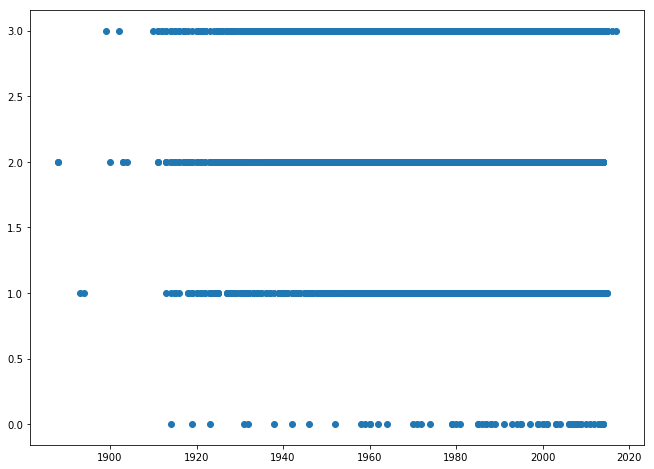

In [25]:
plot.figure(figsize=(11,8))
plot.scatter(movies_df['year'], movies_df['nrOfGenre']);

In [30]:
movies_df[movies_df['nrOfGenre'] == 0]

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
379,titles02/index.html.1306,tt0021331,Das Blut eines Dichters (1932),das blut eines dichters,http://www.imdb.com/title/tt0021331/,7.5,3222.0,3300.0,1932.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1135,titles02/index.html.3803,tt0192167,Irish Cinema: Ourselves Alone? (1995),irish cinema ourselves alone,http://www.imdb.com/title/tt0192167/,5.5,46.0,3060.0,1995.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1630,titles02/index.html.6522,tt1222814,The 66th Annual Golden Globe Awards (TV Movie ...,the th annual golden globe awards tv movie,http://www.imdb.com/title/tt1222814/,8.0,736.0,NaN,2009.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1760,titles02/index.html.898,tt1094599,Ikiru (TV Movie 2007),ikiru tv movie,http://www.imdb.com/title/tt1094599/,5.8,8.0,NaN,2007.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2768,titles03/index.html.2371,tt0108343,Tiny Toons Spring Break (TV Movie 1994),tiny toons spring break tv movie,http://www.imdb.com/title/tt0108343/,7.1,207.0,2700.0,1994.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13348,titles04/index.html.8200,tt0358390,The Big Bend (Video 2003),the big bend video,http://www.imdb.com/title/tt0358390/,6.5,8.0,NaN,2003.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
13499,titles04/index.html.846,tt0038712,Macbeth (1946),macbeth,http://www.imdb.com/title/tt0038712/,7.0,5.0,NaN,1946.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
13753,titles04/index.html.8937,tt0420283,Umineko no minato (1942),umineko no minato,http://www.imdb.com/title/tt0420283/,NaN,NaN,5760.0,1942.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
13823,titles04/index.html.9062,tt0431619,Arya (2004),arya,http://www.imdb.com/title/tt0431619/,7.8,957.0,9060.0,2004.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
